In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
bnb = pd.read_csv("./data/AB_NYC_2019.csv")

In [4]:
bnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [6]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [7]:
bnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
import missingno

In [9]:
!pip install missingno

  Using cached https://files.pythonhosted.org/packages/d8/c2/b407dce6b18d44f52173f6921d62f326e1329dd6d82fa03b380a14612e4c/missingno-0.5.0-py3-none-any.whl


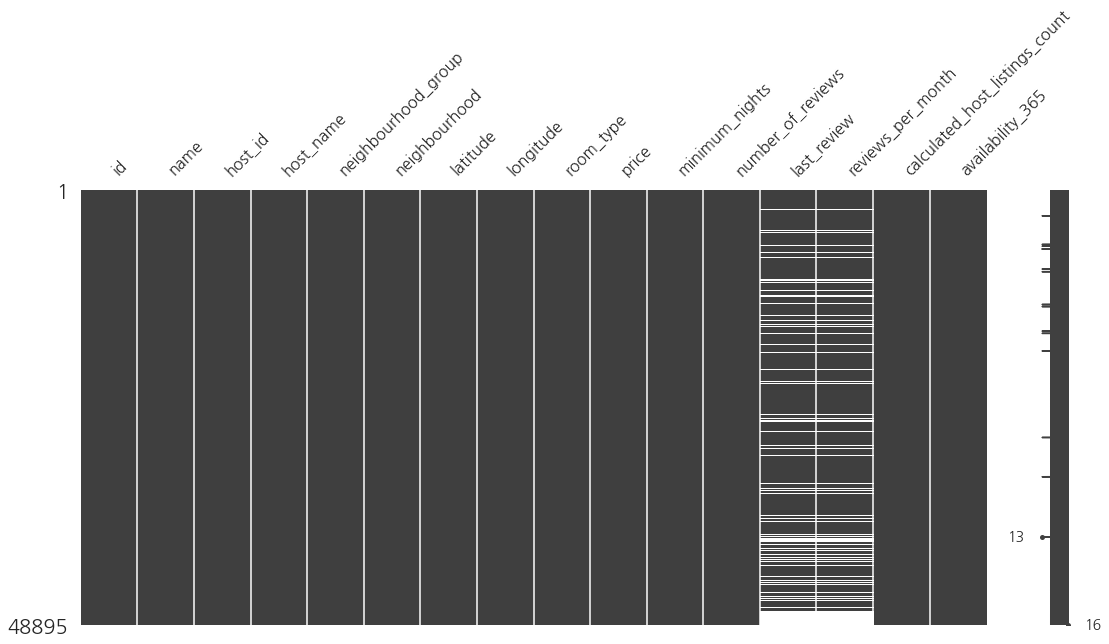

In [12]:
missingno.matrix(bnb, figsize=(18,8))

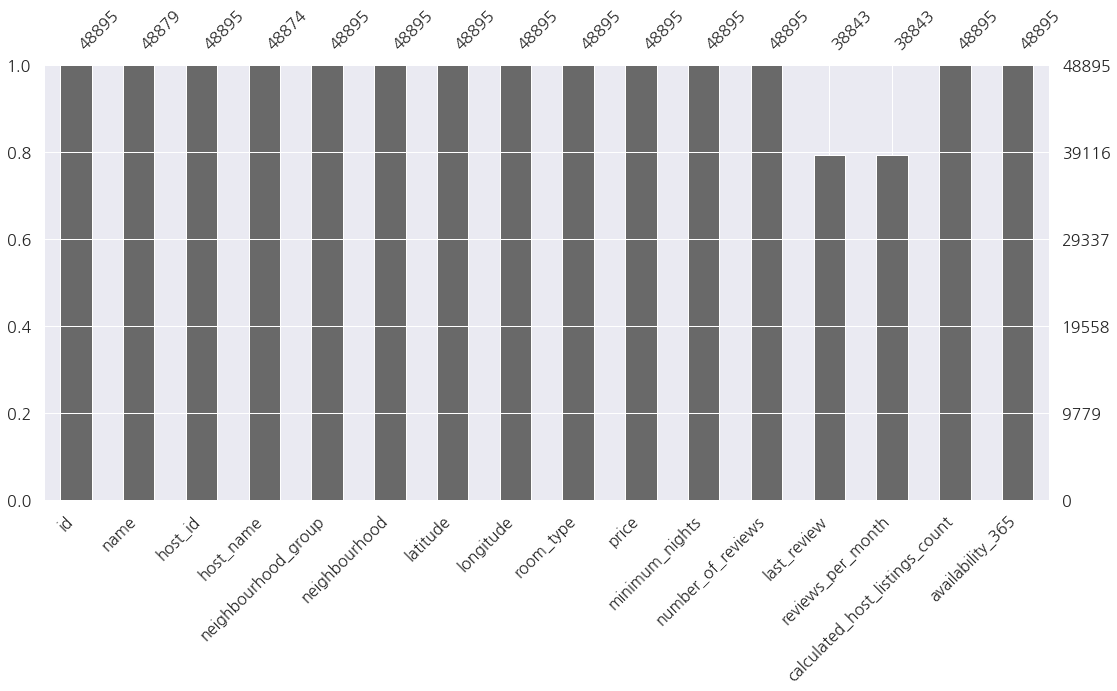

In [13]:
missingno.bar(bnb, figsize=(18,8))

In [14]:
bnb.fillna({'reviews_per_month' : 0}, inplace=True)
bnb.fillna({'name' : 'NoName'}, inplace=True)

In [15]:
bnb.drop(['id', 'last_review'], axis=1, inplace=True)

In [16]:
bnb.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [17]:
bnb[bnb['name'] == bnb['host_name']]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9473,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,0.25,1,25
10682,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,0.15,1,238
16422,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,0.00,1,0
23996,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,0.10,1,0
24152,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,0.08,18,90
24607,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,0.05,18,180
26734,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,0.00,18,365
26752,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,0.05,18,365
26753,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,0.09,18,365
26889,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,0.00,18,365


In [18]:
bnb.duplicated().sum()

0

In [19]:
bnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [20]:
len(bnb[bnb['price'] == 1])

0

In [21]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
name                              48895 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 5.2+ MB


(-1000, 6000)

C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


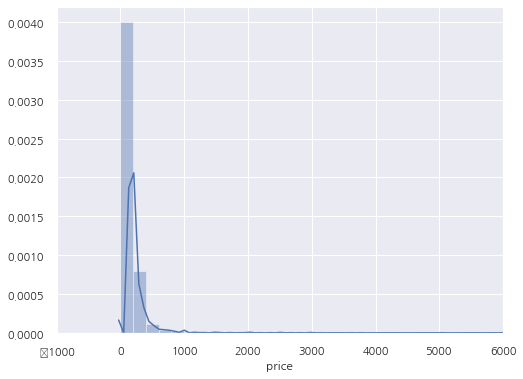

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.distplot(bnb['price'], hist=True, ax=ax)
ax.set_xlim(-1000, 6000)


In [24]:
print("Skewness: %.2f" %bnb['price'].skew())
print("Kurtosis: %.2f" % bnb['price'].kurt())

Skewness: 19.12
Kurtosis: 585.67


In [26]:
pd.concat([bnb['price'], bnb['minimum_nights']], axis=1)

,price,minimum_nights
0,149,1
1,225,1
2,150,3
3,89,1
4,80,10
...,...,...
48890,70,2
48891,40,4
48892,115,10
48893,55,1


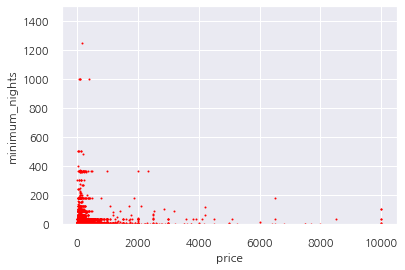

In [27]:
bnb.plot.scatter(x='price', y='minimum_nights', ylim=(0,1500), s=1, color='red')

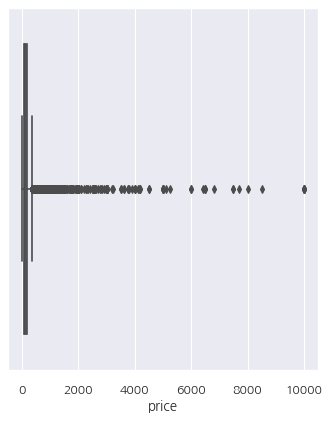

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(5, 6), dpi=80)

sns.boxplot(bnb['price'], showfliers=True, ax=ax)

Text(0.5, 1, 'Correlation map for Airbnb Data')

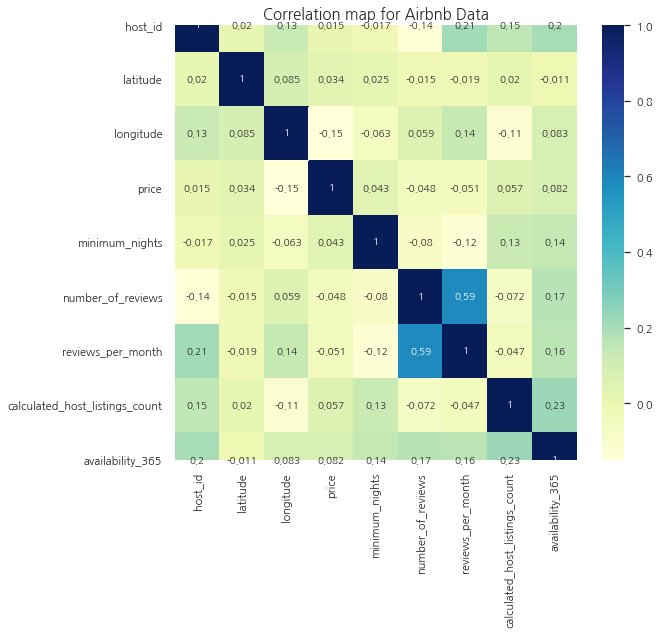

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(9, 8))

corrmat = bnb.corr()
sns.heatmap(corrmat, annot=True, cmap='YlGnBu', ax=ax)
plt.title("Correlation map for Airbnb Data", size=15)

In [30]:
min_threshold, max_threshold = bnb['price'].quantile([0.01, 0.99])

In [31]:
min_threshold, max_threshold

(30.0, 799.0)

In [32]:
bnb[bnb['price'] < min_threshold]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
957,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,0.92,1,226
2675,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,0.07,1,321
2860,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,0.00,4,137
3020,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,5.53,3,50
3918,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,1.22,3,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48486,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,1.00,1,322
48647,Cozy bedroom in diverse neighborhood near JFK,273393150,Liza,Queens,Richmond Hill,40.68639,-73.81847,Private room,28,2,0,0.00,1,24
48832,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,0.00,3,363
48867,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,0.00,6,338


In [33]:
bnb_thr = bnb[(bnb['price'] < max_threshold) & (bnb['price'] > min_threshold)]
bnb_thr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47744 entries, 0 to 48894
Data columns (total 14 columns):
name                              47744 non-null object
host_id                           47744 non-null int64
host_name                         47724 non-null object
neighbourhood_group               47744 non-null object
neighbourhood                     47744 non-null object
latitude                          47744 non-null float64
longitude                         47744 non-null float64
room_type                         47744 non-null object
price                             47744 non-null int64
minimum_nights                    47744 non-null int64
number_of_reviews                 47744 non-null int64
reviews_per_month                 47744 non-null float64
calculated_host_listings_count    47744 non-null int64
availability_365                  47744 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 5.5+ MB


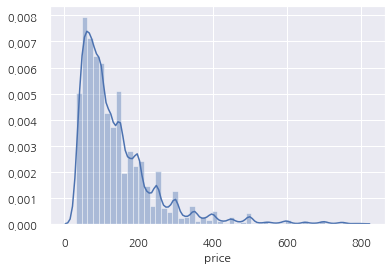

In [34]:
sns.distplot(bnb_thr['price'])

In [35]:
print("Skewness: %.2f" %bnb_thr['price'].skew())
print("Kurtosis: %.2f" %bnb_thr['price'].kurt())

Skewness: 2.24
Kurtosis: 7.04


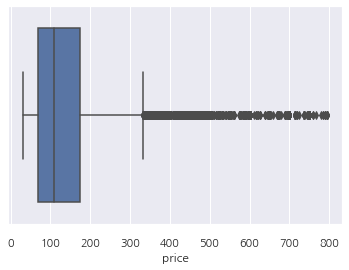

In [36]:
sns.boxplot(bnb_thr['price'])

In [37]:
bnb_thr.head(10)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [38]:
top_host = bnb_thr.host_name.value_counts().head(10)
top_host

Michael         410
David           395
Sonder (NYC)    327
John            288
Alex            272
Blueground      232
Sarah           225
Daniel          223
Jessica         200
Maria           198
Name: host_name, dtype: int64

In [43]:
top_host2 = pd.DataFrame(top_host)
top_host2.reset_index(inplace=True)
top_host2.rename(columns={'index' : 'host_name', 'host_name':'count'}, inplace=True)
top_host2

,host_name,count
0,Michael,410
1,David,395
2,Sonder (NYC),327
3,John,288
4,Alex,272
5,Blueground,232
6,Sarah,225
7,Daniel,223
8,Jessica,200
9,Maria,198


[Text(0, 0, 'Michael'),
 Text(0, 0, 'David'),
 Text(0, 0, 'Sonder (NYC)'),
 Text(0, 0, 'John'),
 Text(0, 0, 'Alex'),
 Text(0, 0, 'Blueground'),
 Text(0, 0, 'Sarah'),
 Text(0, 0, 'Daniel'),
 Text(0, 0, 'Jessica'),
 Text(0, 0, 'Maria')]

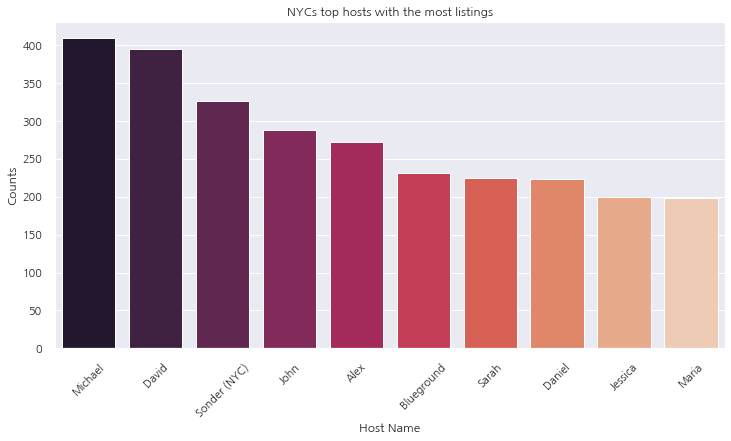

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.barplot(x='host_name', y='count', data=top_host2, palette='rocket', ax=ax)
ax.set_title("NYCs top hosts with the most listings")
ax.set_xlabel("Host Name")
ax.set_ylabel("Counts")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [49]:
bnb_thr.groupby(['neighbourhood_group'])['price'].idxmax()

neighbourhood_group
Bronx             8521
Brooklyn          4428
Manhattan         7017
Queens           14747
Staten Island     3049
Name: price, dtype: int64

In [53]:
bnb_thr.loc[bnb_thr.groupby(['neighbourhood_group'])['price'].idxmax()][['name', 'neighbourhood_group', 'host_name', 'price']]

,name,neighbourhood_group,host_name,price
8521,1 Room in a 2 Bedroom Available,Bronx,Jonathan,680
4428,Unique Brooklyn Brownstone,Brooklyn,Rachel,795
7017,Historic Upper West Side Townhouse,Manhattan,David,795
14747,3 bedroom near Park,Queens,Jackie,750
3049,Spacious center hall colonial,Staten Island,Donna,700


In [54]:
bnb_thr['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Text(0.5, 1.0, 'Prices with different regions')

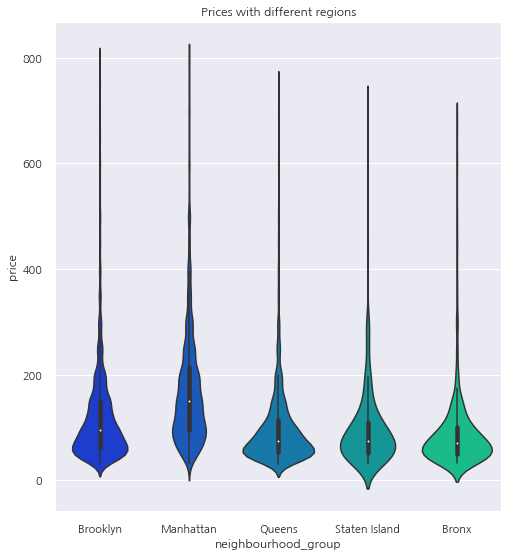

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(8,9))

sns.violinplot(x='neighbourhood_group', y='price', data=bnb_thr, palette='winter', ax=ax)
ax.set_title("Prices with different regions")

In [56]:
bnb_thr['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [57]:
room_type2 = bnb_thr.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack(0)
room_type2

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,377,9470,12887,2080,172
Private room,610,9909,7875,3285,177
Shared room,34,279,458,127,4


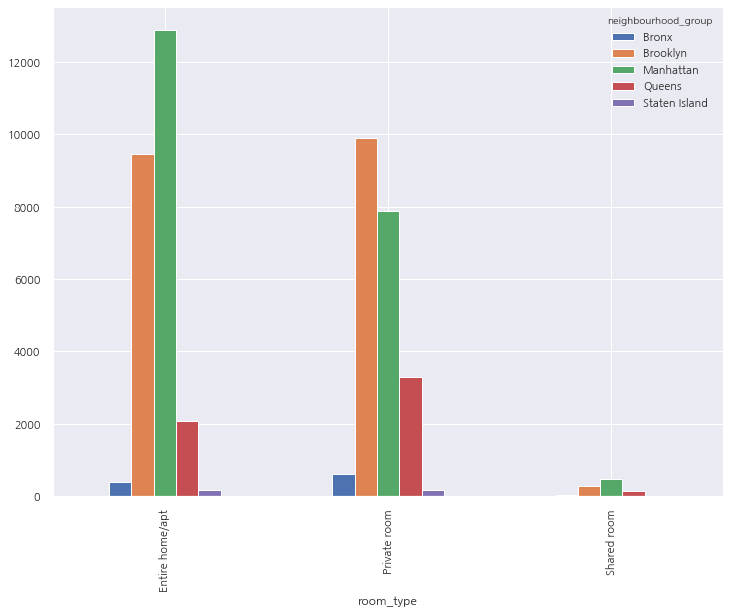

In [58]:
g = room_type2.plot(kind='bar', figsize=(12,9))


In [60]:
top10_review = bnb.nlargest(10, 'reviews_per_month')
top10_review[['name', 'reviews_per_month', 'neighbourhood_group']]

,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58.50,Manhattan
42076,Great Room in the heart of Times Square!,27.95,Manhattan
38870,Lou's Palace-So much for so little,20.94,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16.03,Queens
36238,“For Heaven Cakes”,15.78,Queens
40297,Studio Apartment 6 minutes from JFK Airport,15.32,Queens


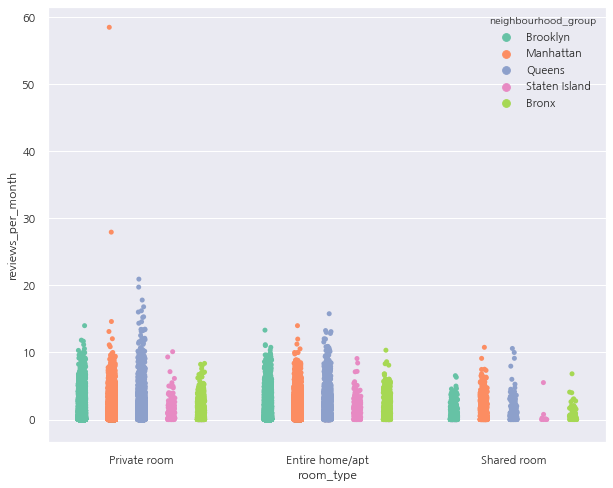

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))

sns.stripplot(x='room_type', y='reviews_per_month', data=bnb, hue='neighbourhood_group', dodge=True, jitter=True, palette='Set2', ax=ax)

C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


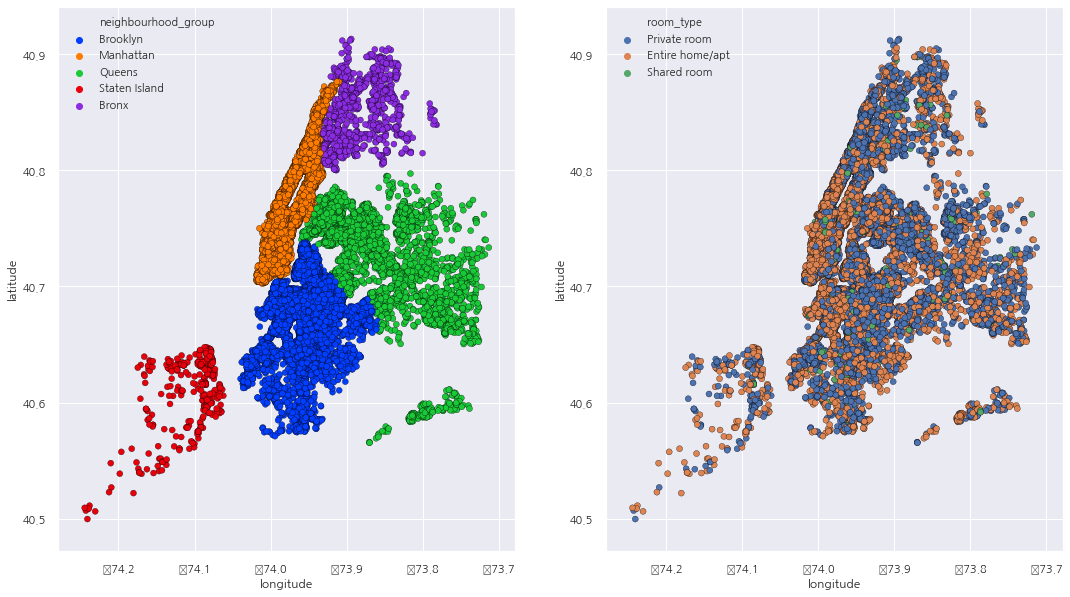

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

sns.scatterplot(x='longitude', y='latitude', data=bnb_thr, hue='neighbourhood_group', palette='bright', edgecolor='black', linewidth=0.3, ax=ax[0])
sns.scatterplot(x='longitude', y='latitude', data=bnb_thr, hue='room_type', edgecolor='black', linewidth=0.3, ax=ax[1])

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [65]:
bnb_md = bnb_thr

In [75]:
labelencoder = LabelEncoder()
bnb_md['neighbourhood_group'] = labelencoder.fit_transform(bnb_md['neighbourhood_group'])
bnb_md['neighbourhood'] = labelencoder.fit_transform(bnb_md['neighbourhood'])
bnb_md['room_type'] = labelencoder.fit_transform(bnb_md['room_type'])
bnb_md


C:\Users\lee45\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lee45\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lee45\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neightbourhood_group
0,Clean & quiet apt home by the park,2787,John,1,107,40.64749,-73.97237,1,149,1,9,0.21,6,365,1
1,Skylit Midtown Castle,2845,Jennifer,2,126,40.75362,-73.98377,0,225,1,45,0.38,2,355,2
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2,93,40.80902,-73.94190,1,150,3,0,0.00,1,365,2
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194,1
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,1,13,40.67853,-73.94995,1,70,2,0,0.00,2,9,1
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,1,28,40.70184,-73.93317,1,40,4,0,0.00,2,36,1
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,2,93,40.81475,-73.94867,0,115,10,0,0.00,1,27,2
48893,43rd St. Time Square-cozy single bed,30985759,Taz,2,94,40.75751,-73.99112,2,55,1,0,0.00,6,2,2


In [76]:
features_columns = ['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']

In [77]:
X = bnb_md[features_columns]

In [78]:
y = bnb_md['price']
train_x

,neighbourhood_group,neighbourhood,room_type,minimum_nights,calculated_host_listings_count,availability_365
21867,Manhattan,118,0,4,1,14
45375,Brooklyn,13,1,2,2,54
5969,Brooklyn,13,0,2,1,132
47532,Manhattan,118,0,2,1,12
16930,Manhattan,126,0,4,1,0
...,...,...,...,...,...,...
11473,Manhattan,118,0,3,1,0
45778,Manhattan,201,0,4,1,301
39002,Brooklyn,28,0,1,2,5
867,Manhattan,93,1,3,3,301


In [79]:
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [80]:
linreg = LinearRegression()
linreg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
test_predict = linreg.predict(test_x)

In [84]:
print(linreg.score(test_x, test_y))

0.27716679698367797


In [86]:
test_predict = linreg.predict(test_x)
error = pd.DataFrame(np.array(test_y).flatten(), columns=['Actual'])
error['Prediction'] = np.array(test_predict)
error['Delta'] = abs(error['Actual'] - error['Prediction'])
error.head(10)

,Actual,Prediction,Delta
0,199,174.746626,24.253374
1,120,115.541544,4.458456
2,225,165.928935,59.071065
3,50,85.630165,35.630165
4,120,177.880436,57.880436
5,138,92.635509,45.364491
6,100,172.596882,72.596882
7,118,197.498136,79.498136
8,95,90.470478,4.529522
9,32,58.981328,26.981328
